# Интерполяция в NumPy

Простейшим подходом математического моделирования является интерполяция.

Использование интерполяции предполагает, что нам известны экспериментальные данные, заданные в виде 
пар значений $(x,y)$, то есть имеется множество пар $A=\{(x_0,y_0), (x_1,y_1),… (x_n,y_n)\}$. Задача 
интерполяции состоит в нахождении значений $y$ для тех значений $x$, которые отсутствуют в данном множестве, 
но при этом выполняется условие $x_0 < x <x_n$.

Решение этой задачи состоит в отыскании такой функции, график которой проходит через указанные в множестве A 
точки. При этом неявно предполагается, что и в промежуточных точках значения интерполирующей и интерполируемой 
функций совпадают, что, конечно, не всегда выполняется.

Обычно для инрполяции используются следующие подходы:

* интерполяция полиномом (степенным многочленом), или интерполяция Ньютона
* интерполяция сплайнами
* аппроксимация функцией

Для использования методов интерполяции нам будет необходим пакет под названием [NumPy](https://numpy.org/).

Импортируем его для дальнейшего использования:

In [2]:
import numpy as np

Зададим значения $x$ и соответствующие им значения $y$.

In [3]:
x = np.array([1, 2, 3, 4])
y = np.array([1, 4, 9, 16])

Как можно видеть, мы пытаемся интерполировать квадратичную функцию:

$$
f(1)=1\\
f(2)=2\\
f(3)=9\\
f(4)=16
$$

Используя подготовленные данные, выполним интерполяцию различными методами.

## Интерполяция полиномом

Рассмотрим простейшую модель в виде степенного многочлена:

$$
y = a_n x^n + a_{n-1} x^{n-1} + \ldots + a_0
$$

Заменим неизвестную нам функцию, значения которой нам даны в виде таблицы, на этот степенной многочлен.

Для того, чтобы найти неизвестные коэффициенты $a_0, a_1, \ldots , a_n$, построим следующую систему уравнений:

$$
a_n x_0^n + a_{n-1} x_0^{n-1} + \ldots + a_0 = y_0\\
a_n x_1^n + a_{n-1} x_1^{n-1} + \ldots + a_0 = y_1\\
\ldots \\
a_n x_n^n + a_{n-1} x_n^{n-1} + \ldots + a_0 = y_n
$$

Здесь $y_i$ - известные значения выходной величины, $x_i$ - известные значения входной величины, 
$a_i$ - неизвестные коэффициенты многочлена.

Очевидно, что данная система линейных алгебраических уравнений может быть представлена в матричном виде,  $A\cdot X=Y$, где $A$ - неизвестная матрица коэффициентов многочлена, $X$ - вектор известных значений входной величины, 
$Y$ - вектор известных значений выходной величины.

Рассмотрим пример решения задачи такого типа.

### Создание матрицы

Построим матрицу x, где каждая строка будет соответствовать одной точке нашего графика (то есть значениям $x_0=1$, $x_1=2$, $x_2=3$ и $x_3=4$), а каждый столбец - различным степеням x:

$$
\begin{array}{cccc}
x_0^n & x_0^{n-1} & \ldots & 1\\
x_1^n & x_1^{n-1} & \ldots & 1\\
\ldots\\
x_n^n & x_n^{n-1} & \ldots & 1
\end{array}
$$

Для этого можно использовать так называемый механизм *list comprehension* (прочтитать, как он используется, можно [здесь](https://devman.org/qna/5/chto-takoe-list-comprehension-zachem-ono-kakie-esche-byvajut/) и [здесь](https://habr.com/ru/post/30232/)) и [функцию *enumerate*](https://younglinux.info/python/feature/enumerate), а так же функцтю [*len*](https://tproger.ru/translations/python-built-ins-worth-learning/), вычисляющую длину списка.

Для начала создадим список из значений *x* и степеней, в которые их нужно возвести:

In [4]:
m0 = [(x[0], len(x) - i - 1) for i in range(len(x))]
m0

[(1, 3), (1, 2), (1, 1), (1, 0)]

Затем построим аналогичный вектор, состоящий не из пар чисел, а из степеней чисел (функция *pow* из модуля *math*):

In [5]:
from math import pow
m0 = [pow(x[0], len(x) - i - 1) for i in range(len(x))]
m0

[1.0, 1.0, 1.0, 1.0]

Повторите эксперимент для других значений *x* в следующей ячейке.

In [6]:
from math import pow
m0 = [pow(x[0], len(x) - i - 1) for i in range(len(x))]
m0

[1.0, 1.0, 1.0, 1.0]

Поскольку наша матрица степеней будет квадратной, давайте создадим заготовку для нее, составив список из значений x:

In [7]:
M = []
for xi in x:
    M.append(xi)
M

[1, 2, 3, 4]

Получили список, состоящий из значений вектора *x*.

Теперь в следующей ячейке вместо значений *x* добавим вектора степеней *x*, как мы делали ранее.

In [13]:
M = []
for xi in x:
    M.append([pow(x[0], len(x) - i - 1) for i in range(len(x))])
M

[[1.0, 1.0, 1.0, 1.0],
 [8.0, 4.0, 2.0, 1.0],
 [27.0, 9.0, 3.0, 1.0],
 [64.0, 16.0, 4.0, 1.0]]

Как можно видеть, матрица заполнена единицами. Так происходит из-за того, что каждый раз в нужную степень возводится $x_0$. Исправьте код в ячейке выше так, чтобы формировалась правильная матрица.

Теперь необходимо преобразовать полученный результат в матрицу NumPy.

In [14]:
M = np.array(M)
M

array([[ 1.,  1.,  1.,  1.],
       [ 8.,  4.,  2.,  1.],
       [27.,  9.,  3.,  1.],
       [64., 16.,  4.,  1.]])

Найдем неизвестные коэффициенты матрицы $A$:

In [15]:
A = np.dot(np.linalg.inv(M), y)
A

array([-6.66133815e-16,  1.00000000e+00, -7.10542736e-15,  3.55271368e-15])

А затем проверим правильность решения системы:

In [16]:
y_new = np.dot(M, A)
y_new

array([ 1.,  4.,  9., 16.])

Создадим новую функцию, вычисляющую значение полинома по заданной матрице $A$ и значению $x$, и поместим ее в новую ячейку блокнота:

In [17]:
import math

def poly(a, x):
    return sum((math.pow(x,i) * ai for i, ai in enumerate(reversed(a))))

Используя функцию, вычислим значение полинома в точках 1 и 2:

In [18]:
poly(A, 1)

0.9999999999999993

и 2

In [19]:
poly(A, 2)

3.9999999999999982

Как можно видеть, результат расчетов правильный.

Теперь давайте построим график.

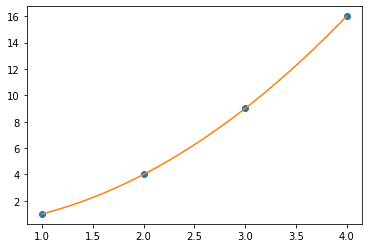

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

xnew = np.linspace(1, 4, num=41, endpoint=True)

y_poly = [poly(A, cur_x) for cur_x in xnew]

fig = plt.figure()
plt.plot(x, y, 'o', xnew, y_poly,'-')

В данной ячейке рабочей тетради мы подключаем возможность использования графических средств (команда *%matplotlib notebook*) , подключаем функции построения графиков (команда *import matplotlib.pyplot as plt*).

Далее мы строим набор значений *x* для получения гладкого графика (команда *xnew = np.linspace(1, 4, num=41, endpoint=True)*). Переменная *xnew* принимает значения от 1 до 4, общее количество значений 41.

Следующей командой мы получаем массив значений *y_poly*, вычисленных нашей функцией *poly* для соответствующих значений *xnew*.

Команда *plt.plot(x, y, 'o', xnew, y_poly,'-')* строит соответствующий график, причем данные (x, y,) выводятся точками (`o`), а значения интерполяции полинома (xnew, y_poly) – сплошной линией (`-`).

## Интерполяция сплайнами

Выполним интерполяцию сплайном:

In [21]:
from scipy.interpolate import interp1d

spl_interp = interp1d(x, y, kind='cubic')

ModuleNotFoundError: No module named 'scipy'

Здесь мы импортируем функцию *interp1d* из пакета *scipy.interpolate*. Эта функция формирует новую функцию под названием *spl_interp*, которая так же принимает один аргумент – значение времени *x*.

Теперь *spl_interp* - это новая функция, вычисляющая значение сплайна в заданной точке.

Проверим значение в точке $x=2$ (мы должны получить значение 4):

In [ ]:
spl_interp(2)

Построим набор новых значений точках, заданных вектором *xnew*:

In [ ]:
y_spl = [spl_interp(cur_x) for cur_x in xnew]

И построим диаграмму, в которой совместим все графики:

In [ ]:
fig = plt.figure()
plt.plot(x, y, 'o', xnew, y_poly,'-', xnew, y_spl, '--')

Значения, полученные интерполяцией сплайном, выводятся пунктирной линией ('--').

Как можно видеть, в данном случае все линии совпадают.